In [1]:
import pandas as pd
import numpy as np


In [2]:
# Modify the base path:
path = "/Users/danielrodriguez/Desktop/"

In [3]:
data_tgv = pd.read_csv(path + "projet-ML-CS/data/tgv_data.csv",sep=";")

In [4]:
data_tgv.columns

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'commentaire_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'commentaire_retards_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'commentaires_retard_arrivee',
       'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
       'prct_cause_prise_en_charge_voyageurs'],
      dtype='object')

In [7]:
pd.options.display.max_columns = None
data_tgv.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,commentaires_retard_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,3.693179,NaN,147,28.436735,6.511118,NaN,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,0.095796,NaN,34,21.524020,5.696096,NaN,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,1.003981,NaN,26,55.692308,7.578947,"Ce mois-ci, l'OD a été touchée par les inciden...",26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,1.966667,NaN,13,48.623077,6.790686,"Ce mois-ci, l'OD a été touchée par les inciden...",8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,0.886889,NaN,71,12.405164,3.346487,NaN,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


prct_cause_prise_en_charge_voyageurs    0.033658
prct_cause_gestion_gare                -0.037750
nb_annulation                          -0.050603
prct_cause_materiel_roulant             0.057268
nb_train_retard_arrivee                -0.067419
prct_cause_infra                        0.067615
nb_train_prevu                         -0.076944
retard_moyen_tous_trains_depart         0.087913
nb_train_depart_retard                 -0.088127
prct_cause_gestion_trafic              -0.134840
nb_train_retard_sup_15                  0.145277
retard_moyen_depart                     0.208410
prct_cause_externe                      0.242947
nb_train_retard_sup_30                  0.260398
retard_moyen_tous_trains_arrivee        0.285933
nb_train_retard_sup_60                  0.371302
duree_moyenne                           0.418651
retard_moyen_trains_retard_sup15        0.529987
retard_moyen_arrivee                    1.000000
Name: retard_moyen_arrivee, dtype: float64

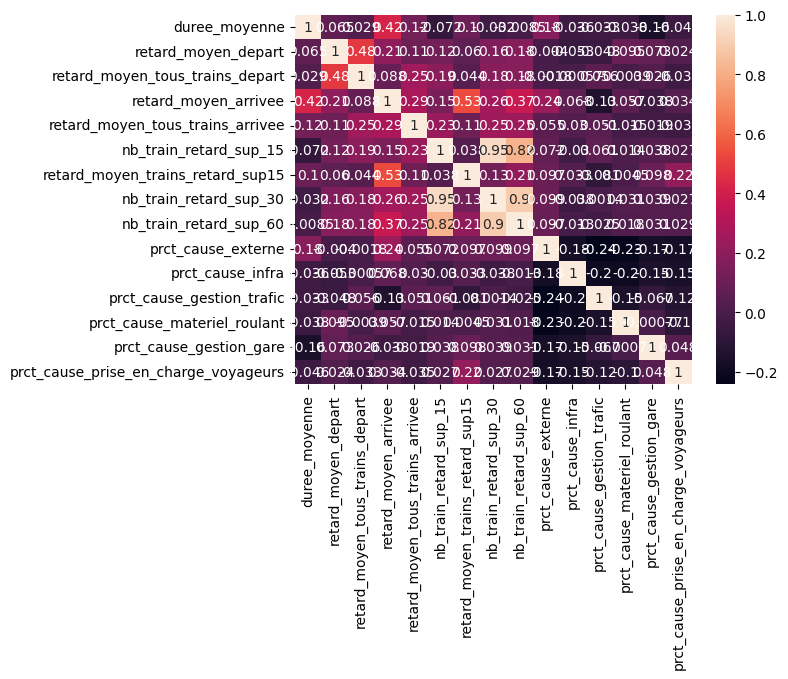

In [18]:
from IPython.display import display
# Compute correlations
corr_mat = data_tgv[['duree_moyenne','nb_train_prevu', 'nb_annulation','nb_train_depart_retard', 'retard_moyen_depart',
         'retard_moyen_tous_trains_depart', 'nb_train_retard_arrivee', 'retard_moyen_arrivee',
         'retard_moyen_tous_trains_arrivee','nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
         'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
         'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
         'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
         'prct_cause_prise_en_charge_voyageurs']].corr()
display(corr_mat["retard_moyen_arrivee"].sort_values(key=abs))

# Show correlation matrix
corr_mat_reduced = data_tgv[['duree_moyenne','retard_moyen_depart',
         'retard_moyen_tous_trains_depart', 'retard_moyen_arrivee',
         'retard_moyen_tous_trains_arrivee','nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
         'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
         'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
         'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
         'prct_cause_prise_en_charge_voyageurs']].corr()
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corr_mat_reduced, annot=True)
plt.show()


- Nous avons observer les correlations et nous avons enlever les dimensions qui ne nous interessent pas :
    - nb_train_prevu: correlation faible et intuitivement cette feature n'influence pas le retard_moyen_arrivée
    - nb_annulation: correlation faible et intuitivement cette feature n'influence pas le retard_moyen_arrivée
    - nb_train_depart_retard: correlation faible et intuitivement cette feature n'influence pas le retard_moyen_arrivée
    - nb_train_retard_arrivee: correlation faible et intuitivement cette feature n'influence pas le retard_moyen_arrivée
    - Tous le commentaire ont été supprimés

Il peut être plus interessant de calculer les proportions mais on pourra voir ca plus tard pour les causes de retard
    

In [17]:
data_tgv.describe()

,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
count,8154.000000,8154.000000,8154.000000,0.0,8154.000000,8154.000000,8154.000000,0.0,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,169.860314,257.198308,11.349644,NaN,88.434265,11.205745,3.076737,NaN,34.516066,33.950971,5.668612,24.434511,32.193823,11.642016,4.245892,23.266846,21.888418,19.052124,18.995179,6.714513,7.127315
std,87.390774,173.815703,26.544553,NaN,90.384803,12.476780,5.432676,NaN,29.729349,15.702663,7.971691,21.400761,20.195926,11.225104,4.901032,16.805192,15.692521,14.947548,14.256533,8.080759,10.249453
min,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,-229.269444,NaN,0.000000,-40.109259,-472.638889,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,142.000000,0.000000,NaN,22.000000,5.128410,1.140258,NaN,13.000000,24.636941,3.129384,9.000000,12.140350,4.000000,1.000000,11.764706,11.538462,8.695652,9.523810,0.000000,0.000000
50%,164.000000,221.000000,3.000000,NaN,55.000000,9.036447,2.248271,NaN,27.000000,32.441236,4.962422,19.000000,34.932765,9.000000,3.000000,20.967742,20.000000,16.949153,17.165179,5.000000,3.703704
75%,221.000000,333.000000,10.000000,NaN,129.000000,14.219375,3.903651,NaN,47.000000,41.346717,7.673542,33.000000,44.268749,16.000000,6.000000,32.307692,30.000000,26.923077,26.086957,10.000000,10.000000
max,786.000000,1075.000000,297.000000,NaN,596.000000,316.188095,84.516667,NaN,376.000000,299.600000,92.000000,312.000000,299.600000,202.000000,71.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Les données sont plutôt bien remplies, pas de données manquantes appart les commentaires.

In [ ]:
# Turn the dataframe into a new dataframe that has only two columns:
# 1. The name of the trip (i.e. the departure and arrival stations)
# 2. The retard_moyen_arrivee vector (grouping by date)

vector_data = data_tgv[["date","gare_depart","gare_arrivee","retard_moyen_arrivee"]].copy()
vector_data["trajet"]=vector_data["gare_depart"]+" - "+vector_data["gare_arrivee"]


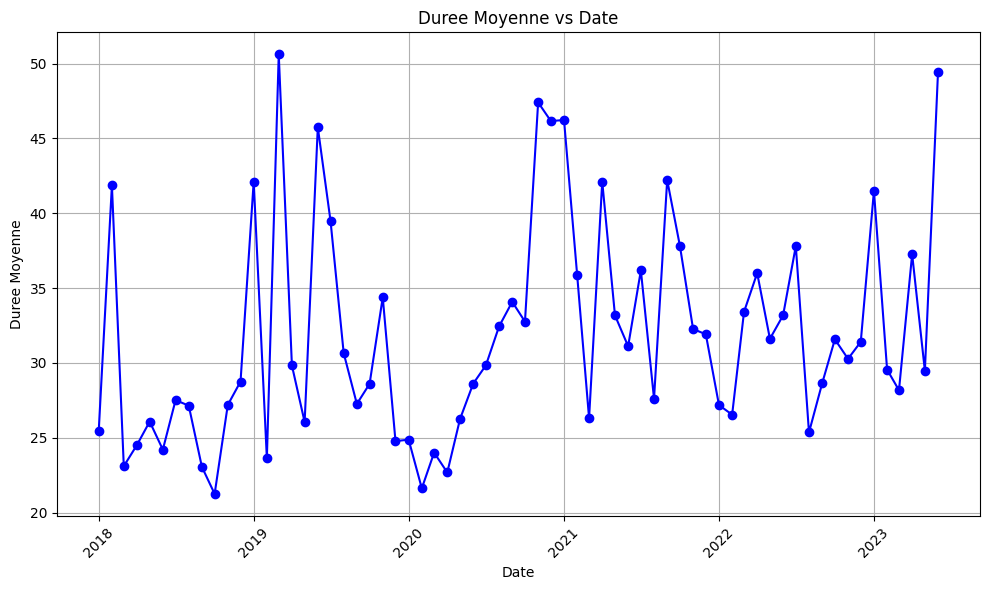

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'date' and 'duree_moyenne' columns
# For example:
# df = pd.DataFrame({'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
#                    'duree_moyenne': [5, 7, 3]})

# Convert 'date' column to datetime if it's not already in datetime format
paris_bordeaux_df['date'] = pd.to_datetime(paris_bordeaux_df['date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(paris_bordeaux_df['date'], paris_bordeaux_df['retard_moyen_arrivee'], marker='o', color='b', linestyle='-')
plt.title('Duree Moyenne vs Date')
plt.xlabel('Date')
plt.ylabel('Duree Moyenne')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [10]:
useful_dimensions = ['date','retard_moyen_arrivee']

In [11]:
df = paris_bordeaux_df[useful_dimensions].copy()

In [12]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

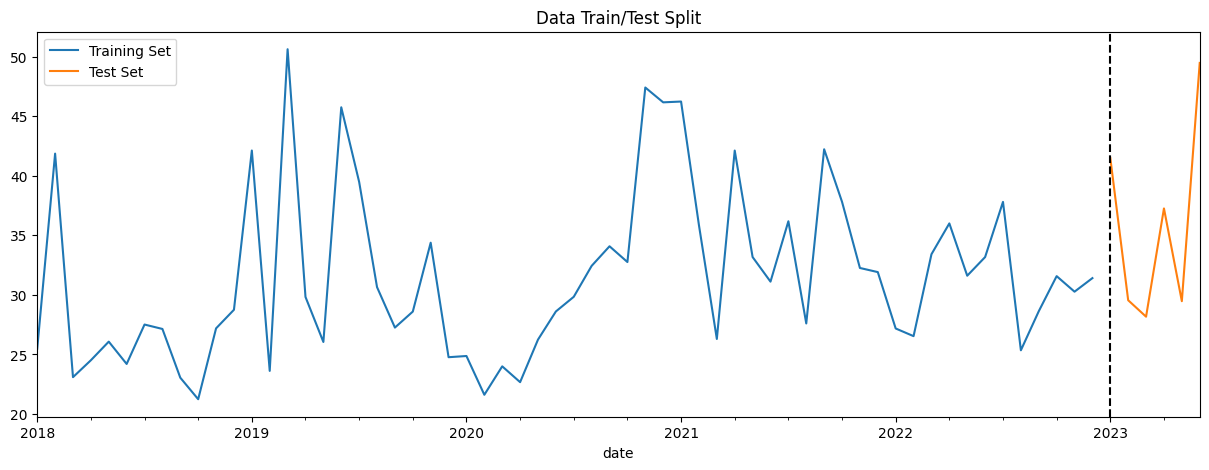

In [13]:
train = df.loc[df.index < '01-01-2023']
test = df.loc[df.index >= '01-01-2023']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [14]:
def sliding_window(elements, window_size):
    matrix = []
    if len(elements) <= window_size:
       return elements
    for i in range(len(elements)- window_size + 1):
        matrix+=[elements[i:i+window_size]]
    
    return matrix

In [15]:
data_sw = pd.DataFrame(sliding_window(df.retard_moyen_arrivee.tolist(),5),columns=["D-4","D-3","D-2","D-1","D"])

In [16]:
data_sw["date"]=df.index[4:]

In [17]:
data_sw.head()

,D-4,D-3,D-2,D-1,D,date
0,25.479114,41.854352,23.095833,24.514620,26.076364,2018-05-01
1,41.854352,23.095833,24.514620,26.076364,24.203111,2018-06-01
2,23.095833,24.514620,26.076364,24.203111,27.511538,2018-07-01
3,24.514620,26.076364,24.203111,27.511538,27.141129,2018-08-01
4,26.076364,24.203111,27.511538,27.141129,23.050962,2018-09-01


In [18]:
train_df = data_sw[data_sw["date"]< "2023-01-01"].copy()
test_df = data_sw[data_sw["date"]>= "2023-01-01"].copy()

In [19]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train_df[["D-4","D-3","D-2","D-1"]], train_df["D"])




LinearRegression()

In [20]:

lr_y_test_pred = lr_model.predict(test_df[["D-4","D-3","D-2","D-1"]])
lr_y_train_pred = lr_model.predict(train_df[["D-4","D-3","D-2","D-1"]])

df_to_plot = pd.DataFrame({"date":data_sw["date"].tolist(),"retard":data_sw["D"].tolist(),"retard_predit":lr_y_train_pred.tolist()+lr_y_test_pred.tolist()})


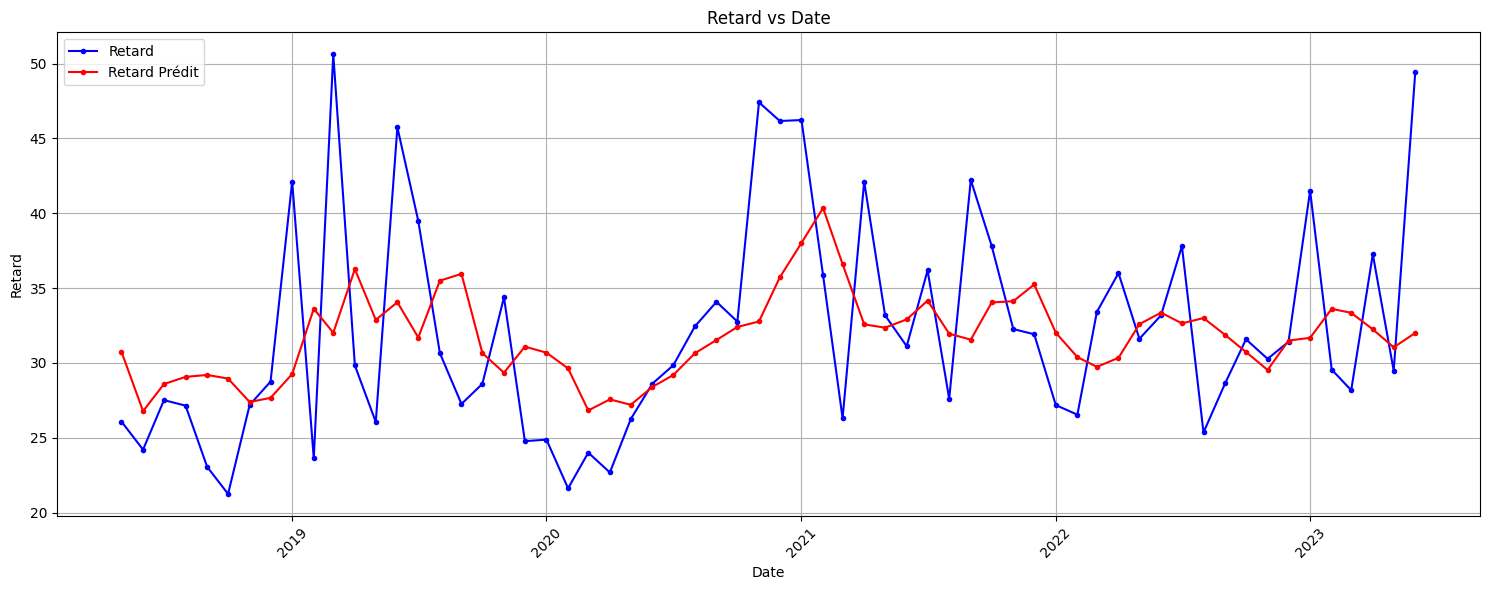

In [21]:
plt.figure(figsize=(15, 6))
plt.plot(df_to_plot['date'], df_to_plot['retard'], marker='.', color='b', linestyle='-', label='Retard')
plt.plot(df_to_plot['date'], df_to_plot['retard_predit'], marker='.', color='r', linestyle='-', label='Retard Prédit')
plt.title('Retard vs Date')
plt.xlabel('Date')
plt.ylabel('Retard')
plt.legend()  # Show legend to distinguish between 'retard' and 'retard_predit'
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### Approches possibles
- Sliding window avec normalisation ou non de la data et faire des regressions
- Clustering des comportements de chaque trajet pour essayer de comprendre des patterns commun au sein de certains trajets. 